# LoREco simulation output



In [1]:
include("../backend/simulation.jl")

BASIC_SUMSY = SuMSy(2000, 0, 0.01, 1)

using Plots

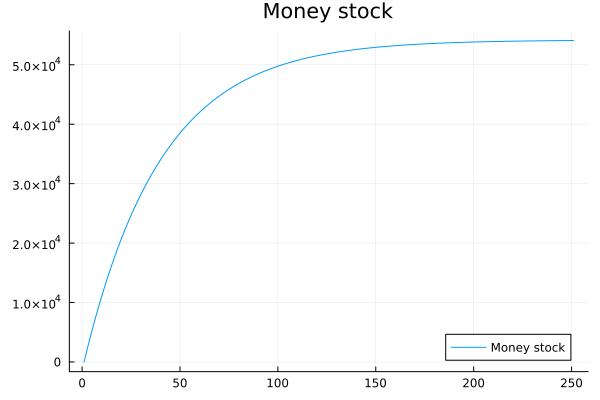

In [2]:
# data = run_simulation(BASIC_SUMSY, "../sim_configurations/abm_test_config.json", 1000)
# data = run_simulation(BASIC_SUMSY, "../sim_configurations/loreco_conservative.json", 1000)
data = run_simulation(BASIC_SUMSY, "../sim_configurations/loreco_basic_associations.json", 250)
plot(analyse_money_stock(data)[!, :money_stock], label = "Money stock", title = "Money stock", legend = :bottomright)

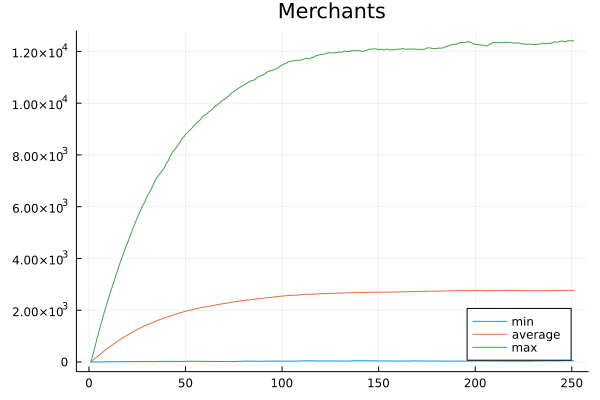

In [45]:
wealth = analyse_wealth(data)

if haskey(wealth, :merchant)
    plot(wealth[:merchant].poorest, label = "min", legend = :bottomright, title = "Merchants")
    plot!(wealth[:merchant].average, label = "average", legend = :bottomright)
    plot!(wealth[:merchant].richest, label = "max", legend = :bottomright)
end

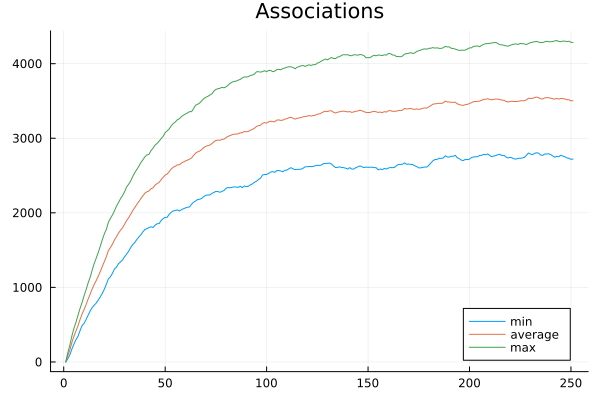

In [46]:
if haskey(wealth, :association)
    wealth = analyse_wealth(data)
    plot(wealth[:association].poorest, label = "min", legend = :bottomright, title = "Associations")
    plot!(wealth[:association].average, label = "average", legend = :bottomright)
    plot!(wealth[:association].richest, label = "max", legend = :bottomright)
end

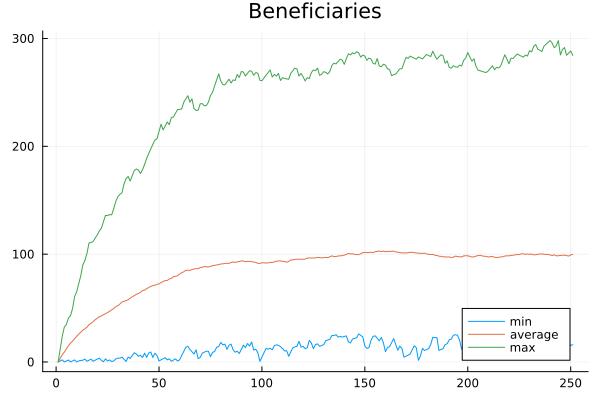

In [47]:
if haskey(wealth, :beneficiary)
    wealth = analyse_wealth(data)
    plot(wealth[:beneficiary].poorest, label = "min", legend = :bottomright, title = "Beneficiaries")
    plot!(wealth[:beneficiary].average, label = "average", legend = :bottomright)
    plot!(wealth[:beneficiary].richest, label = "max", legend = :bottomright)
end

In [48]:
if haskey(wealth, :civilian)
    wealth = analyse_wealth(data)
    plot(wealth[:civilian].poorest, label = "min", legend = :bottomright, title = "Civilians")
    plot!(wealth[:civilian].average, label = "average", legend = :bottomright)
    plot!(wealth[:civilian].richest, label = "max", legend = :bottomright)
end

In [49]:
if haskey(wealth, :governance)
    wealth = analyse_wealth(data)
    plot(wealth[:governance].average, label = "reserve", legend = :bottomright, title = "Governance")
end

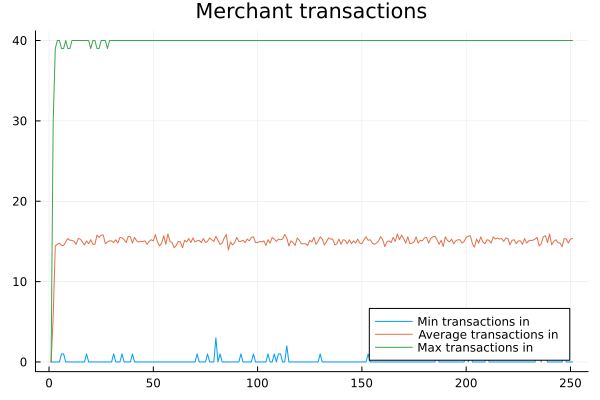

In [50]:
transaction_data = analyse_transaction_data(data)

if haskey(transaction_data, :merchant)
    plot(transaction_data[:merchant].min_transactions_in, label = "Min transactions in", legend = :bottomright, title = "Merchant transactions")
    plot!(transaction_data[:merchant].average_transactions_in, label = "Average transactions in")
    plot!(transaction_data[:merchant].max_transactions_in, label = "Max transactions in")
end

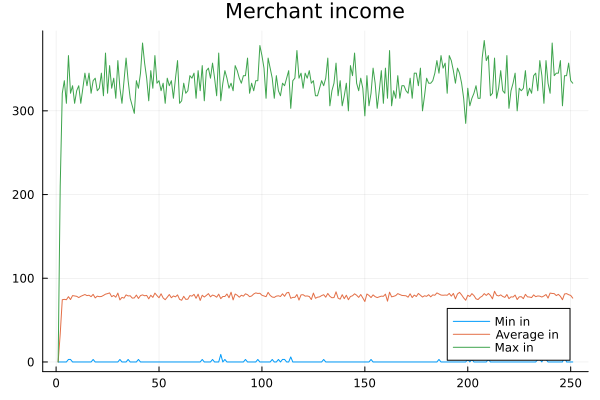

In [51]:
if haskey(transaction_data, :merchant)
    plot(transaction_data[:merchant].min_transaction_volume_in, label = "Min in", legend = :bottomright, title = "Merchant income")
    plot!(transaction_data[:merchant].average_transaction_volume_in, label = "Average in")
    plot!(transaction_data[:merchant].max_transaction_volume_in, label = "Max in")
end

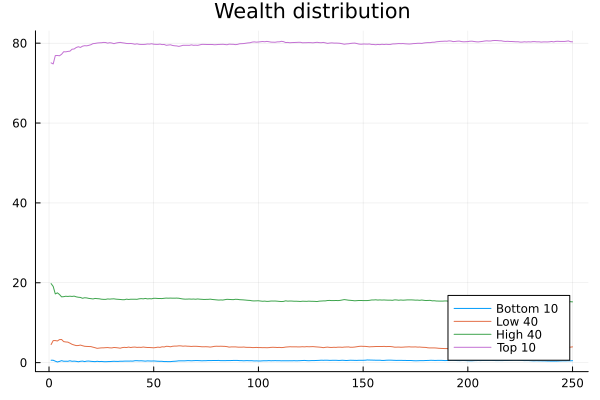

In [52]:
wealth_distribution, type_distribution = analyse_wealth_distribution(data)

plot(wealth_distribution[:bottom_10], label = "Bottom 10", legend = :bottomright, title = "Wealth distribution")
plot!(wealth_distribution[:low_40], label = "Low 40")
plot!(wealth_distribution[:high_40], label = "High 40")
plot!(wealth_distribution[:top_10], label = "Top 10")

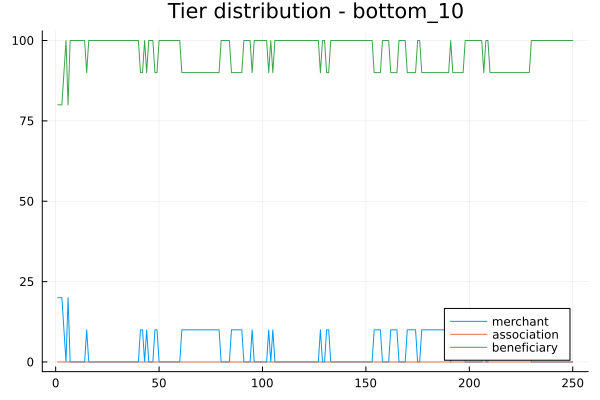

In [53]:
plots = Dict()

for tier in [:bottom_10, :low_40, :high_40, :top_10]
    index = 1

    for types in values(CATEGORY_DICT)
        for type in types
            if index == 1
                plots[tier] = plot(type_distribution[tier][type], label = String(type), legend = :bottomright, title = "Tier distribution - " * String(tier))
            else
                plot!(plots[tier], type_distribution[tier][type], label = String(type), legend = :bottomright)
            end

            index += 1
        end
    end
end

plots[:bottom_10]

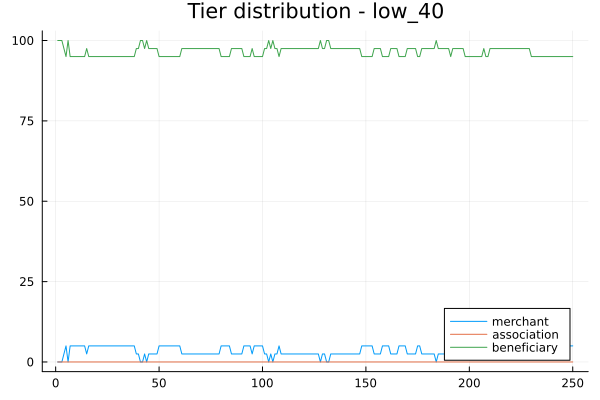

In [54]:
plots[:low_40]

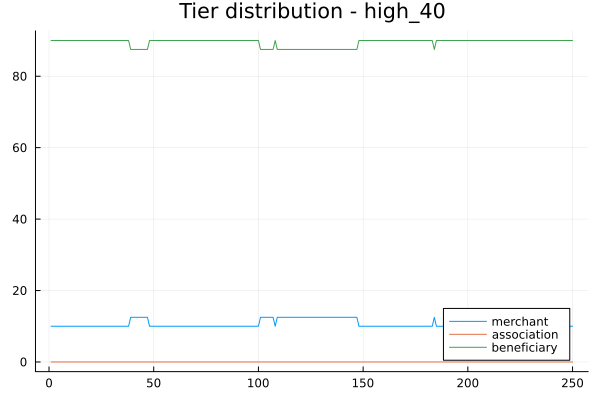

In [55]:
plots[:high_40]

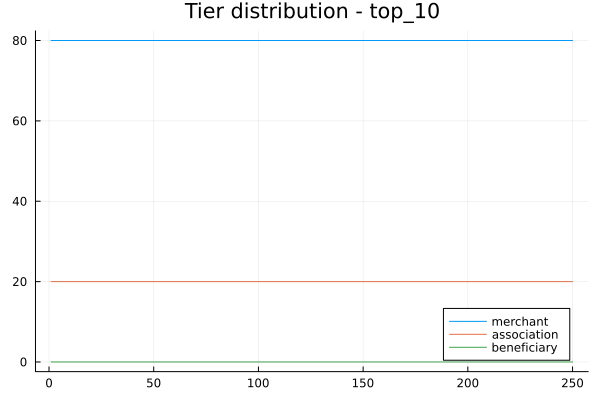

In [56]:
plots[:top_10]